### Requirements:
- Python3
- Scipy, numpy, matplotlib, skmonaco
(pip3 install --upgrade numpy scipy matplotlib scikit-monaco)




# Import modules and Functions

## Modules

In [3]:
%matplotlib inline
import sys
sys.path.append('Python/')
from main import *

# Main - AMP and State Evolution

## Parameters

In [4]:
### Parameters
K = 2 
PW_choice = 'binary' #PW_choice= binary or gaussian
N = 10000 # N=1000 for test (fast) - N=10000 to be very precise
alpha = 1.8
print_Running = True

## Approximate Message Passing

#### Run AMP: training on M=alpha*N samples

In [5]:
obj_AMP = run_AMP(K,PW_choice,N,alpha,print_Running)

Initialization
K= 2 PW= binary alpha= 1.8
Start AMP: Thu May 31 17:16:47 2018
q_AMP=
[0. 0.]
[0. 0.]
Step = 1 Diff_q = 0.8061577286430603 Diff_What = 101.13721787165194
q_AMP=
[0.51494643 0.25172442]
[0.25172442 0.50792725]
Step = 2 Diff_q = 0.0999777264789731 Diff_What = 91.48962352405994
q_AMP=
[0.47986991 0.18857749]
[0.18857749 0.47981827]
Step = 3 Diff_q = 0.07413427855481905 Diff_What = 79.58161463692642
q_AMP=
[0.47956538 0.24099095]
[0.24099095 0.47861159]
Step = 4 Diff_q = 0.030558369965040043 Diff_What = 68.9453703217564
q_AMP=
[0.4595006  0.25296766]
[0.25296766 0.46298034]
Step = 5 Diff_q = 0.02542656544870112 Diff_What = 63.954368575654236
q_AMP=
[0.44545155 0.26210526]
[0.26210526 0.44618323]
Step = 6 Diff_q = 0.02013809688472349 Diff_What = 59.69121333072212
q_AMP=
[0.43332772 0.27202318]
[0.27202318 0.43832032]
Step = 7 Diff_q = 0.01727862582964893 Diff_What = 56.2924541771093
q_AMP=
[0.42985741 0.27843946]
[0.27843946 0.42403149]
Step = 8 Diff_q = 0.007173473277155725 

q_AMP=
[0.44206128 0.26531075]
[0.26531075 0.44013834]
Step = 66 Diff_q = 0.0013854934773070318 Diff_What = 11.406878644311504
q_AMP=
[0.44191282 0.26483945]
[0.26483945 0.44134387]
Step = 67 Diff_q = 0.0010283008989887157 Diff_What = 11.178344804109207
q_AMP=
[0.44251272 0.26458602]
[0.26458602 0.4405895 ]
Step = 68 Diff_q = 0.000839218973890087 Diff_What = 10.705962067670928
q_AMP=
[0.44183976 0.26490194]
[0.26490194 0.4403619 ]
Step = 69 Diff_q = 0.001104975590927392 Diff_What = 10.486457125361964
q_AMP=
[0.44140308 0.26540504]
[0.26540504 0.43963798]
Step = 70 Diff_q = 0.001045065661864367 Diff_What = 10.065039111106241
q_AMP=
[0.44070381 0.26590782]
[0.26590782 0.43932554]
Step = 71 Diff_q = 0.0009832391021972215 Diff_What = 9.839244040659578
q_AMP=
[0.44077962 0.26640537]
[0.26640537 0.43864297]
Step = 72 Diff_q = 0.0005287524356322475 Diff_What = 9.520372947804564
q_AMP=
[0.4404743  0.26665755]
[0.26665755 0.43839974]
Step = 73 Diff_q = 0.0007904093397029237 Diff_What = 9.228314

q_AMP=
[0.45485826 0.25455346]
[0.25455346 0.45232492]
Step = 131 Diff_q = 0.00017794926030010455 Diff_What = 0.8444236608825034
q_AMP=
[0.45473339 0.25463079]
[0.25463079 0.45226078]
Step = 132 Diff_q = 8.551868868460966e-05 Diff_What = 0.8074968330269788
q_AMP=
[0.45471403 0.25468359]
[0.25468359 0.45222386]
Step = 133 Diff_q = 3.568893091245291e-05 Diff_What = 0.7642832730082917
q_AMP=
[0.45471528 0.25469117]
[0.25469117 0.45218984]
Step = 134 Diff_q = 9.6804556666039e-05 Diff_What = 0.7164678605555127
q_AMP=
[0.4546228 0.2547112]
[0.2547112  0.45219388]
Step = 135 Diff_q = 9.185495448487988e-05 Diff_What = 0.6795824744818587
q_AMP=
[0.45456528 0.25475144]
[0.25475144 0.4521504 ]
Step = 136 Diff_q = 8.853475411799063e-05 Diff_What = 0.6482567170891239
q_AMP=
[0.45456517 0.25478692]
[0.25478692 0.45207746]
Step = 137 Diff_q = 9.136871365819712e-05 Diff_What = 0.6260503111278705
q_AMP=
[0.45451355 0.2548398 ]
[0.2548398  0.45208699]
Step = 138 Diff_q = 6.478722733355521e-05 Diff_What 

q_AMP=
[0.45437721 0.25493652]
[0.25493652 0.45189021]
Step = 195 Diff_q = 3.3453014291194985e-06 Diff_What = 0.05193838350282538
q_AMP=
[0.45437722 0.25493545]
[0.25493545 0.45188723]
Step = 196 Diff_q = 5.465864289196468e-06 Diff_What = 0.049217122604483084
q_AMP=
[0.45437424 0.25493849]
[0.25493849 0.45188564]
Step = 197 Diff_q = 2.5401641671875496e-06 Diff_What = 0.046675943256361194
q_AMP=
[0.45437263 0.25493847]
[0.25493847 0.4518876 ]
Step = 198 Diff_q = 5.080388102121224e-06 Diff_What = 0.044996870109564074
q_AMP=
[0.45437658 0.25493907]
[0.25493907 0.45188452]
Step = 199 Diff_q = 5.801479586039971e-06 Diff_What = 0.042747465827721626
q_AMP=
[0.45437423 0.25493987]
[0.25493987 0.45187933]
Step = 200 Diff_q = 5.3525566752256986e-06 Diff_What = 0.041312945422700094
q_AMP=
[0.45437068 0.25493975]
[0.25493975 0.45188334]
Step = 201 Diff_q = 3.2138559872150955e-06 Diff_What = 0.03910736754024619
q_AMP=
[0.45437272 0.25493909]
[0.25493909 0.45188564]
Step = 202 Diff_q = 5.14615527437

#### 2. Plot the evolution of $q_{AMP}^t$

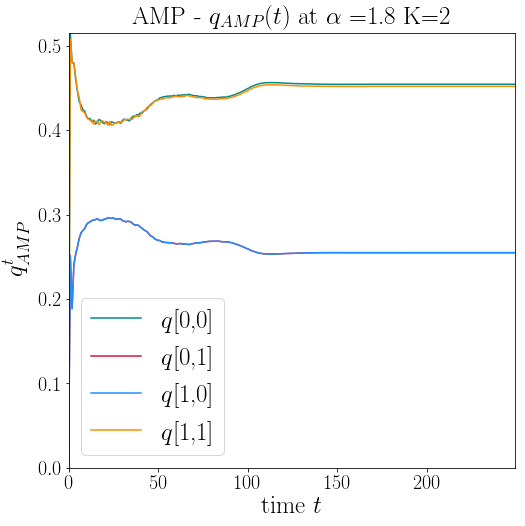

In [6]:
plot_q(obj_AMP)

#### 3. AMP generalization error (over N_samples_gen_error new samples)

In [ ]:
## Compute the corresponding Generalization Error
N_samples_gen_error = 10000
run_gen_error_AMP(obj_AMP,K,PW_choice,N,alpha,N_samples_gen_error)

Start Gen Error
0.0 %
10.0 %


## State Evolution

#### 1. Run SE (initialization with backup to speed up)

In [8]:
obj_SE= run_SE(K,PW_choice,alpha,print_Running)

Start initialization
Succeed to load old objects :  Nearest alpha= 1.8
Initialization succeed 

K= 2 PW= binary alpha= 1.8 channel= sign-sign
Start SE: Thu May 31 20:43:50 2018
Step =  1 diff q = 3.796412725853848e-07
Final overlap q=
[0.45836988 0.24338854]
[0.24338854 0.45836988]
End SE


#### 2. Compute SE geneealization error

In [9]:
run_gen_error_SE(obj_SE)

alpha= 1.8 gen_err= 0.13496950000000002
